# TP2 - Une étoile est-elle un pulsar ?

On souhaite prédire si les observations d'étoiles présente dans le [dataset](https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate) sont des [pulsars](https://fr.wikipedia.org/wiki/Pulsar) ou non. Puisque la réponse est *oui* ou *non*, nous sommes dans le cadre d'un apprentissage supervisé et plus spécifiquement une classification. Nous allons utiliser une régression logistique pour répondre à ce problème.

## Contrôle de la qualité de donnée

Commençons par importer les données et les observer.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("pulsar_stars.csv")
df.head(15)

,Mean_ip,Std_ip,Excess_kurtosis_ip,Skewness_ip,Mean_DM,Std_DM,Excess_kurtosis_DM,Skewness_DM,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


Comme nous travaillons avec un problème de classification, on souhaite connaître la proportion de déséquilibre. C'est la proportion d'observation de la classe d'intérêt dans la totalité du dataset.

**Consigne** : Calculer la proportion de déséquilibre.

In [2]:
# Calculer la proportion de déséquilibre
proportion_desequilibre = df['target'].mean()
print("Proportion de déséquilibre : ", proportion_desequilibre)

Proportion de déséquilibre: 0.09


On souhaite avoir une vue rapide du dataset. En exploitant la méthode `describe` on obtient :

In [3]:
df.describe()

,Mean_ip,Std_ip,Excess_kurtosis_ip,Skewness_ip,Mean_DM,Std_DM,Excess_kurtosis_DM,Skewness_DM,target
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


Il ne semble pas y avoir de valeurs aberrantes, mais on souhaite le vérifier. Pour le faire, nous allons tracer la distribution de chacune des colonnes. 

**Consigne** : Ecrire une fonction nommé `plot_column` qui prend en paramètre :
* *df*: un dataset
* *column*: une chaîne de caractère qui correspond au nom de la colonne que l'on va visualiser
Cette fonction a pour objectif d'afficher la distribution de la colonne *column* du dataset *df*.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_column(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Consigne** : Exploiter la fonction `plot_column` pour contrôler qu'il n'y a pas de valeurs aberrante.

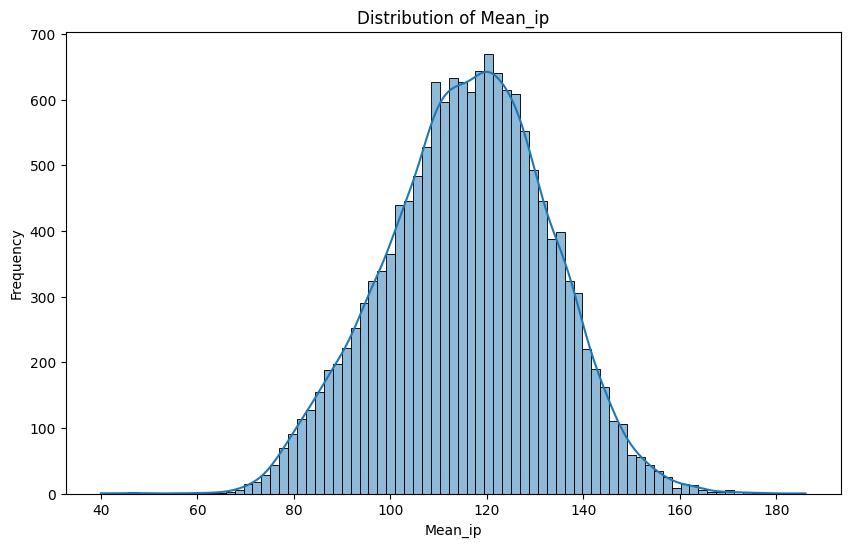

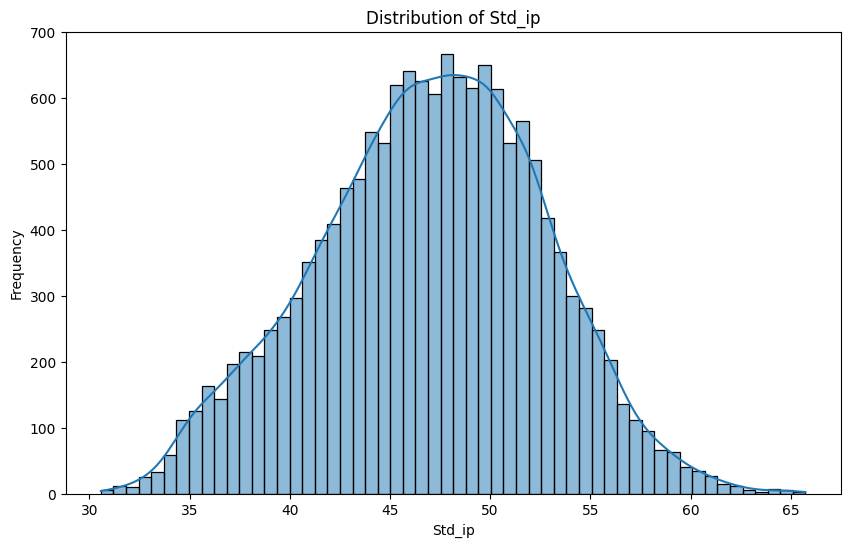

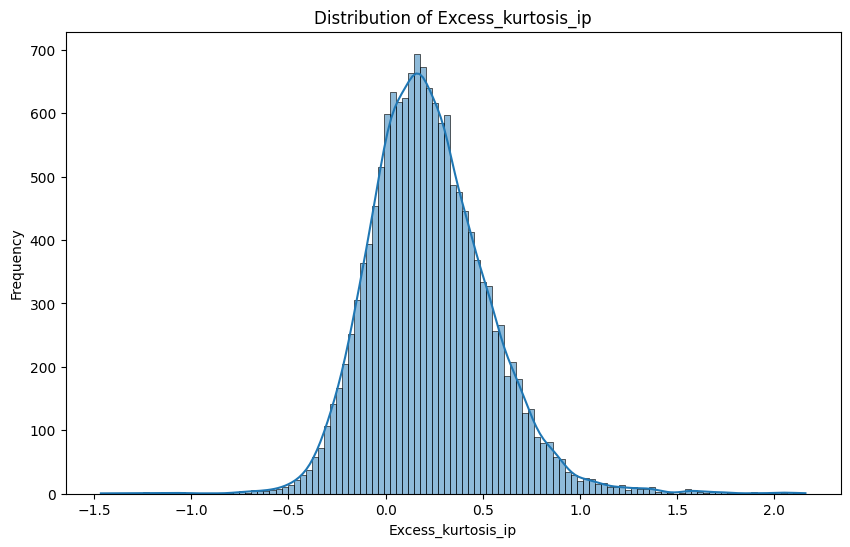

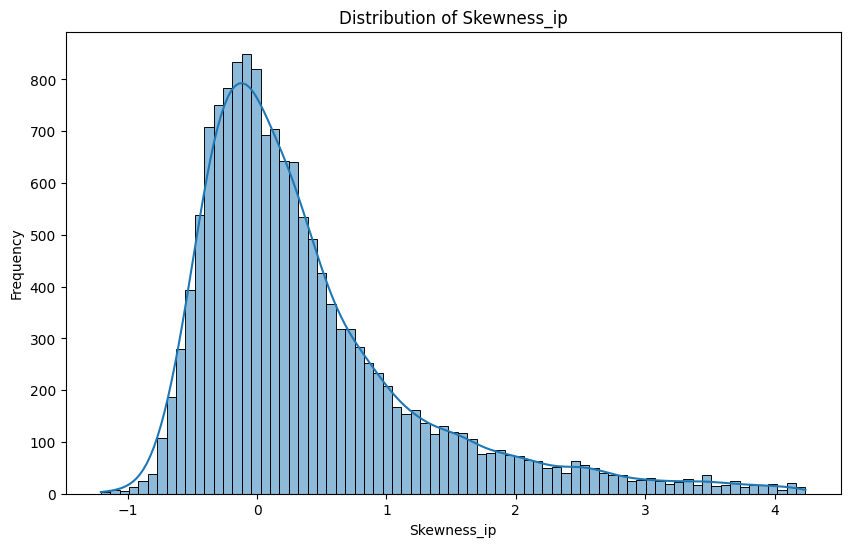

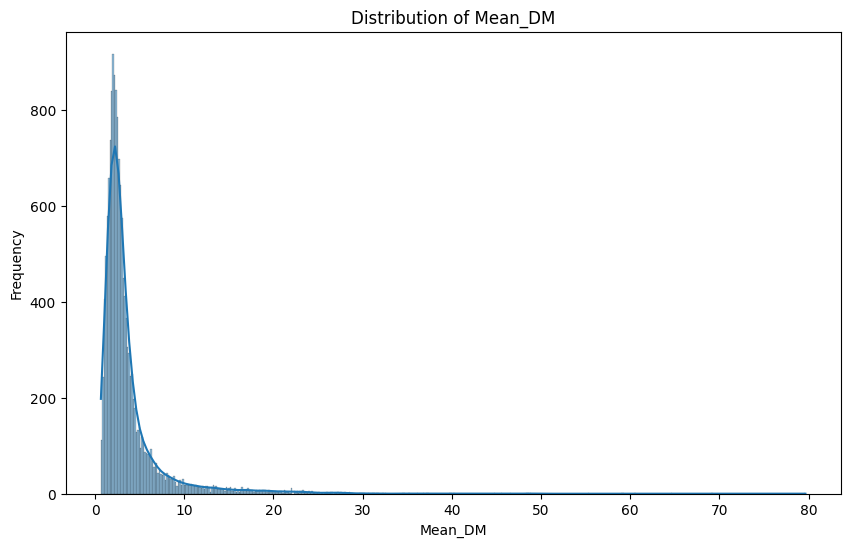

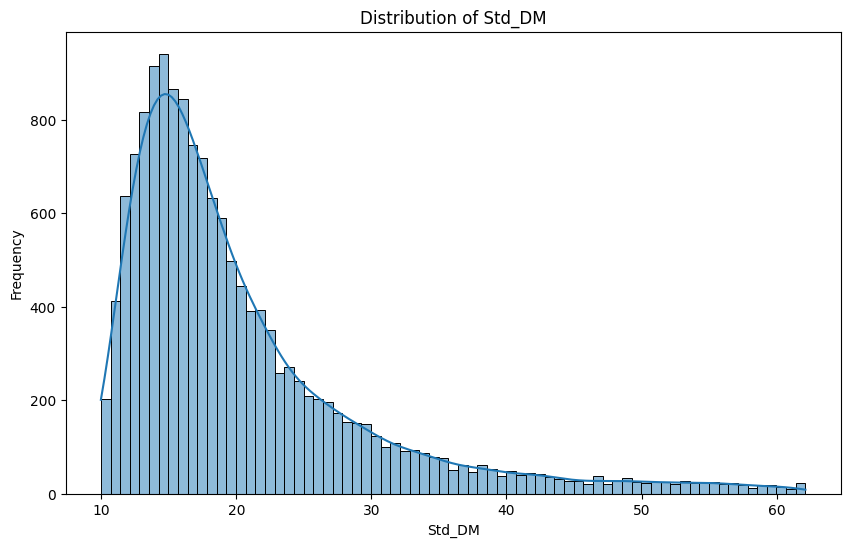

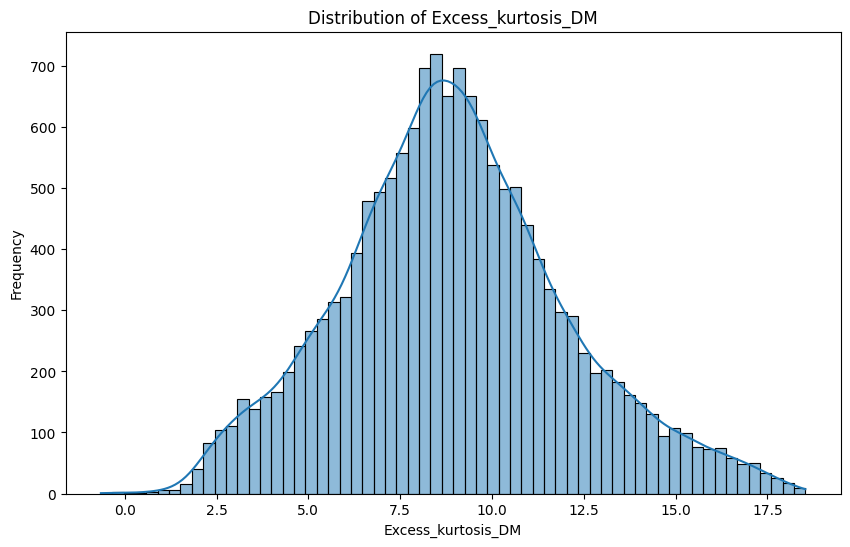

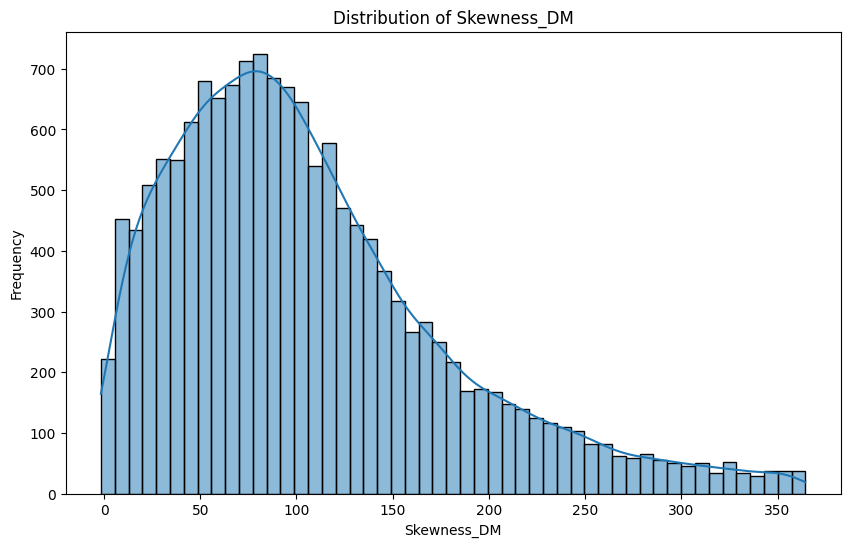

In [7]:
columns_to_check = df.columns[:-1]  # Exclure la colonne 'target'

for column in columns_to_check:
    plot_column(df, column)

## Modélisation

Pour mesurer la performance de notre future modélisation, nous allons utiliser la validation croisée et plus spécifiquement la fonction [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) de scikit-learn.

**Consigne** : Construire une fonction `performance` qui prend en paramètre un vecteur *vector* et qui affiche la moyenne et l'écart-type au format suivant : *moyenne (+/- ecart-type)*

In [9]:
def performance(vector):
    mean = np.mean(vector)
    std = np.std(vector)
    print(f"{mean:.2f} (+/- {std:.2f})")

**Consigne** : réaliser une validation croisée pour la mesure de performance d'une [régression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). On affichera les performance à l'aide de la fonction `performance`.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Définir les caractéristiques et la cible
X = df.drop('target', axis=1)
y = df['target']

# Initialiser le modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)

# Réaliser la validation croisée
scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')

# Afficher les performances
performance(scores)

0.99 (+/- 0.00)


Une régression logistique est censée apprendre la probabilité d'appartenance à la classe d'intérêt. Nous avons donc accès à plusieurs *seuil*. Concrètement, en choisissant un seuil différent de 0.5 (celui par défaut), nous pouvons obtenir avec le même modèle plusieurs prédictions différentes. Nous souhaitons mesurer cela.

**Consigne** : Couper le dataset *df* en une base d'entraînement et une base de test. On utilisera le paramètre *stratify* de la fonction [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

**Consigne** : Entraîner la régression logistique sur la base d'entraînement puis prédire les probabilités d'appartenance à la classe d'intérêt pour la base de test.

**Consigne** : calculer la performance pour les seuils 0.1, 0.5 et 0.9.

On souhaite visualiser les courbes de performances selon la valeur du seuil choisi. On souhaite mesurer la performance selon plusieurs métriques :
* La [précision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
* Le [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
* Le [f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

**Consigne** : Construire une fonction `plot_metrics` qui prends en paramètre :
* *y_proba* : un vecteur de probabilité d'appartenance à la classe d'intérêt
* *y_true* : un vecteur qui correspond aux valeurs que l'on doit prédire
Elle tracera pour plusieurs seuil (on pourra utiliser la fonction *np.linspace*) la performance pour ces trois métriques.

## Régularisations

Par défaut, l'implémentation de la [régression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) dans scikit-learn utilise la régularisation $\mathcal{L}_2$.

**Consigne** : Entrainer une régression logitisque sans aucune régularisation.

On cherche à mesurer l'impact de la régularisation $\mathcal{L}_2$ sur la qualité de prédiction. 

**Consigne** : Entraîner plusieurs régression logisitique en faisant varier la force de la régularisation.